![](logesticproblem.jpg)

In [1]:
# Recall (FN is more harmful for the Insurance company)
# Actual Value is Positive and Pridicted value is Negative is False Negative
# Client will hire a Attorney and Our model will pridict Client will not hire a Attorney
# We will try to Create a Model whose Recall Value would be MAXIMUM

![](problemdata.jpg)

- Goal is to create a Classification Model which can predict all possible classes correctly. (Recall should be High)

### Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Machine-Learning/main/Logistic%20Regression/Client.csv', index_col=0)
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,1,0.0,1.0,0.0,50.0,34.940
1,3,0,1.0,0.0,0.0,18.0,0.891
2,66,0,0.0,1.0,0.0,5.0,0.330
3,70,1,0.0,1.0,1.0,31.0,0.037
4,96,0,0.0,1.0,0.0,30.0,0.038


### EDA

In [4]:
df.drop(columns='CASENUM', inplace=True)

In [5]:
df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,1,0.0,1.0,0.0,50.0,34.940
1,0,1.0,0.0,0.0,18.0,0.891
2,0,0.0,1.0,0.0,5.0,0.330
3,1,0.0,1.0,1.0,31.0,0.037
4,0,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,0,0.0,1.0,0.0,NaN,0.576
1336,1,1.0,1.0,0.0,46.0,3.705
1337,0,1.0,1.0,0.0,39.0,0.099
1338,1,1.0,0.0,0.0,8.0,3.177


In [6]:
df.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.511194,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,1.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [7]:
#Check Missing Value

In [8]:
df.isna()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1335,False,False,False,False,True,False
1336,False,False,False,False,False,False
1337,False,False,False,False,False,False
1338,False,False,False,False,False,False


In [9]:
df.isna().sum()
#.sum() give us the count

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [10]:
# Missing value imputation

In [11]:
# CLMSEX, CLMINSUR and SEATBELT are the Categorical Columns (Yes/No) so we use MODE value
# CLMAGE is a Continuous Numercial Value we will choose between MEAN and MEDIAN if outliers are present we will choose MEDIAN or Visa Versa

In [12]:
# df['CLMINSUR'].fillna(df['CLMINSUR'].mode()[0])
# We have write the above code for every one column so the better way to this is

In [13]:
# Missing value imputation
from sklearn.impute import SimpleImputer

In [14]:
si = SimpleImputer(strategy='most_frequent')

In [15]:
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,1,0.0,1.0,0.0,50.0,34.940
1,0,1.0,0.0,0.0,18.0,0.891
2,0,0.0,1.0,0.0,5.0,0.330
3,1,0.0,1.0,1.0,31.0,0.037
4,0,0.0,1.0,0.0,30.0,0.038


In [16]:
df.iloc[:,1:4]

,CLMSEX,CLMINSUR,SEATBELT
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,1.0
4,0.0,1.0,0.0
...,...,...,...
1335,0.0,1.0,0.0
1336,1.0,1.0,0.0
1337,1.0,1.0,0.0
1338,1.0,0.0,0.0


In [17]:
df.iloc[:,1:4]= si.fit_transform(df.iloc[:,1:4])

In [18]:
df.isna().sum()

ATTORNEY      0
CLMSEX        0
CLMINSUR      0
SEATBELT      0
CLMAGE      189
LOSS          0
dtype: int64

In [19]:
df['CLMAGE'].fillna(df['CLMAGE'].median(), inplace=True)

In [20]:
df.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [21]:
# Data is Ready
# Step to Create a Supervised Regression Model
# 1. Define x (independent)and y(target)
# 2. Split the data (Training and Testing data)
# 3. Create a Model using a Training data
# 4. Get Pridiction using Test Data
# 5. Evalution 

### Model Buliding

In [22]:
# 1. Define x (independent)and y(target)
x = df.iloc[:, 1:]
y = df['ATTORNEY']

In [23]:
x

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1335,0.0,1.0,0.0,30.0,0.576
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [24]:
y

0       1
1       0
2       0
3       1
4       0
       ..
1335    0
1336    1
1337    0
1338    1
1339    0
Name: ATTORNEY, Length: 1340, dtype: int64

In [25]:
# 2. Split the data (Training and Testing data)

In [26]:
df.head(10)

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,1,0.0,1.0,0.0,50.0,34.940
1,0,1.0,0.0,0.0,18.0,0.891
2,0,0.0,1.0,0.0,5.0,0.330
3,1,0.0,1.0,1.0,31.0,0.037
4,0,0.0,1.0,0.0,30.0,0.038
5,1,1.0,1.0,0.0,35.0,0.309
6,1,0.0,1.0,0.0,9.0,3.538
7,1,1.0,1.0,0.0,34.0,4.881
8,0,1.0,1.0,0.0,60.0,0.874
9,0,0.0,1.0,0.0,30.0,0.350


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# (x) is where the Independent columns are stored
# (y) is where the Dependent (Target) column are stored
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=42)

When you set random_state to a specific number (e.g., random_state=42), it ensures that the random splitting of the data will be reproducible. In other words, if you use the same random_state value in different runs of your code, the splitting will yield the same results. This is helpful for reproducibility purposes and for ensuring consistent results, especially when you're sharing code or conducting experiments where you want others to obtain the same split as you did.

The actual value, in this case, '42', doesn't hold any specific significance. It's just an arbitrary number chosen for the random seed. The crucial point is that using the same random_state value allows you to obtain the same train-test split every time you run the code, ensuring consistency in the splits between your training and testing datasets.

In [29]:
xtrain,xtest,ytrain,ytest

(      CLMSEX  CLMINSUR  SEATBELT  CLMAGE     LOSS
 1148     1.0       1.0       0.0     7.0    3.734
 807      0.0       1.0       0.0    16.0  111.405
 1287     0.0       0.0       0.0    10.0    0.040
 590      1.0       1.0       0.0     6.0    0.100
 1188     1.0       1.0       0.0    44.0   13.000
 ...      ...       ...       ...     ...      ...
 1095     0.0       1.0       0.0    47.0    0.080
 1130     1.0       1.0       0.0    30.0    5.595
 1294     1.0       1.0       0.0    30.0    1.041
 860      1.0       0.0       0.0    55.0    1.769
 1126     1.0       1.0       0.0    30.0    0.080
 
 [1072 rows x 5 columns],
       CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
 394      1.0       1.0       0.0     5.0   5.163
 881      0.0       0.0       0.0    30.0   5.570
 358      1.0       1.0       0.0    41.0   0.671
 367      0.0       1.0       0.0    34.0   0.567
 259      0.0       1.0       1.0    66.0   4.530
 ...      ...       ...       ...     ...     ...
 109      

In [30]:
# 3. Create a Model using a Training data
from sklearn.linear_model import LogisticRegression

In [31]:
# Create an object/variable for LogisticRegression
lg = LogisticRegression()
# For train a model we to pass both Independent and Dependent Features
lg.fit(xtrain,ytrain)
# This will give the slope (m) value 
lg.coef_

array([[-0.36427295, -0.33524203,  0.70473018, -0.00883013,  0.41189508]])

In [32]:
# 4. Get Pridiction using Test Data
ypred = lg.predict(xtest)

In [33]:
len(xtest)

268

In [34]:
len(ypred)

268

In [35]:
# 5. Evalution 
print('Actual Y: ', ytest[:25].values)
print('Predict Y:', ypred[:25])

Actual Y:  [1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0]
Predict Y: [1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1]


In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       140
           1       0.76      0.66      0.71       128

    accuracy                           0.74       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.74      0.74      0.74       268



In [38]:
confusion_matrix(ytest,ypred)

array([[113,  27],
       [ 43,  85]], dtype=int64)

Text(240.30555555555557, 0.5, 'Predicted Values')

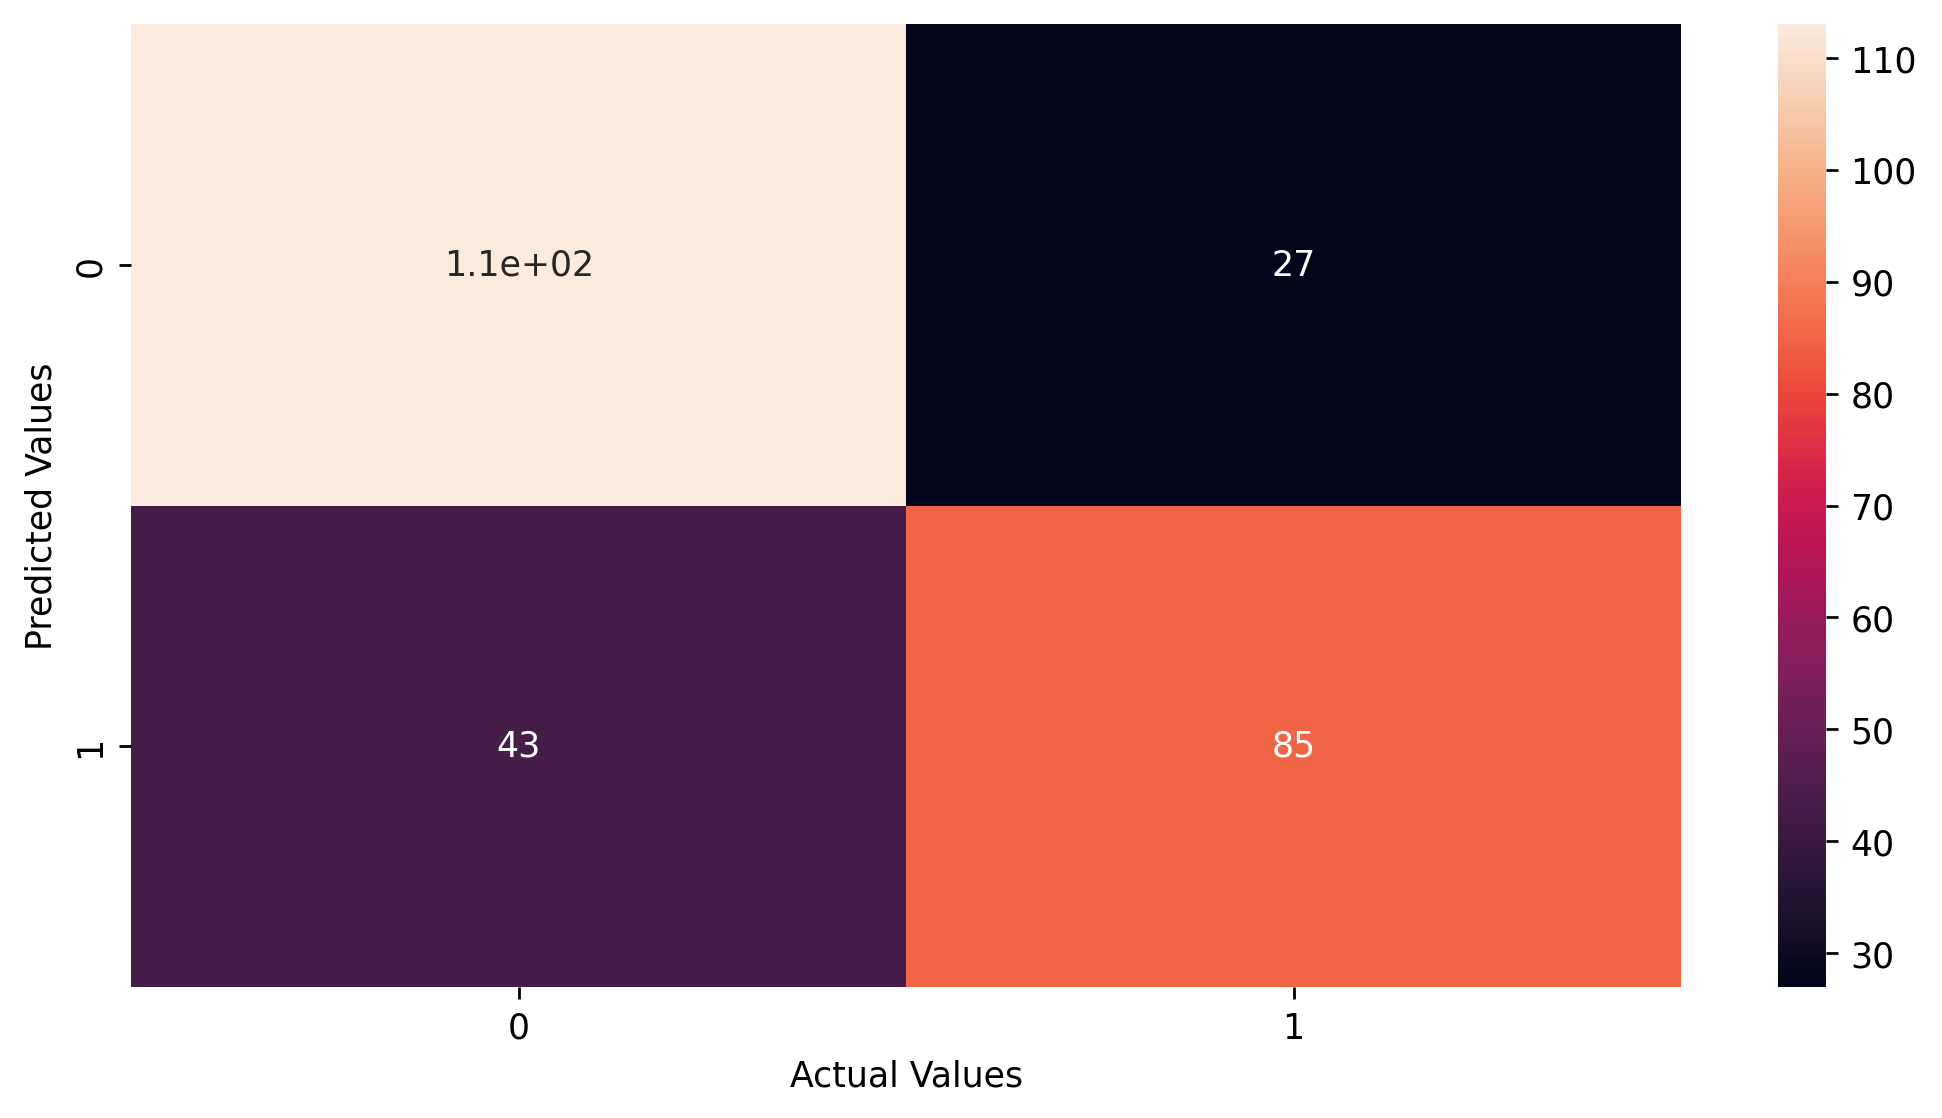

In [39]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Text(240.30555555555557, 0.5, 'Predicted Values')

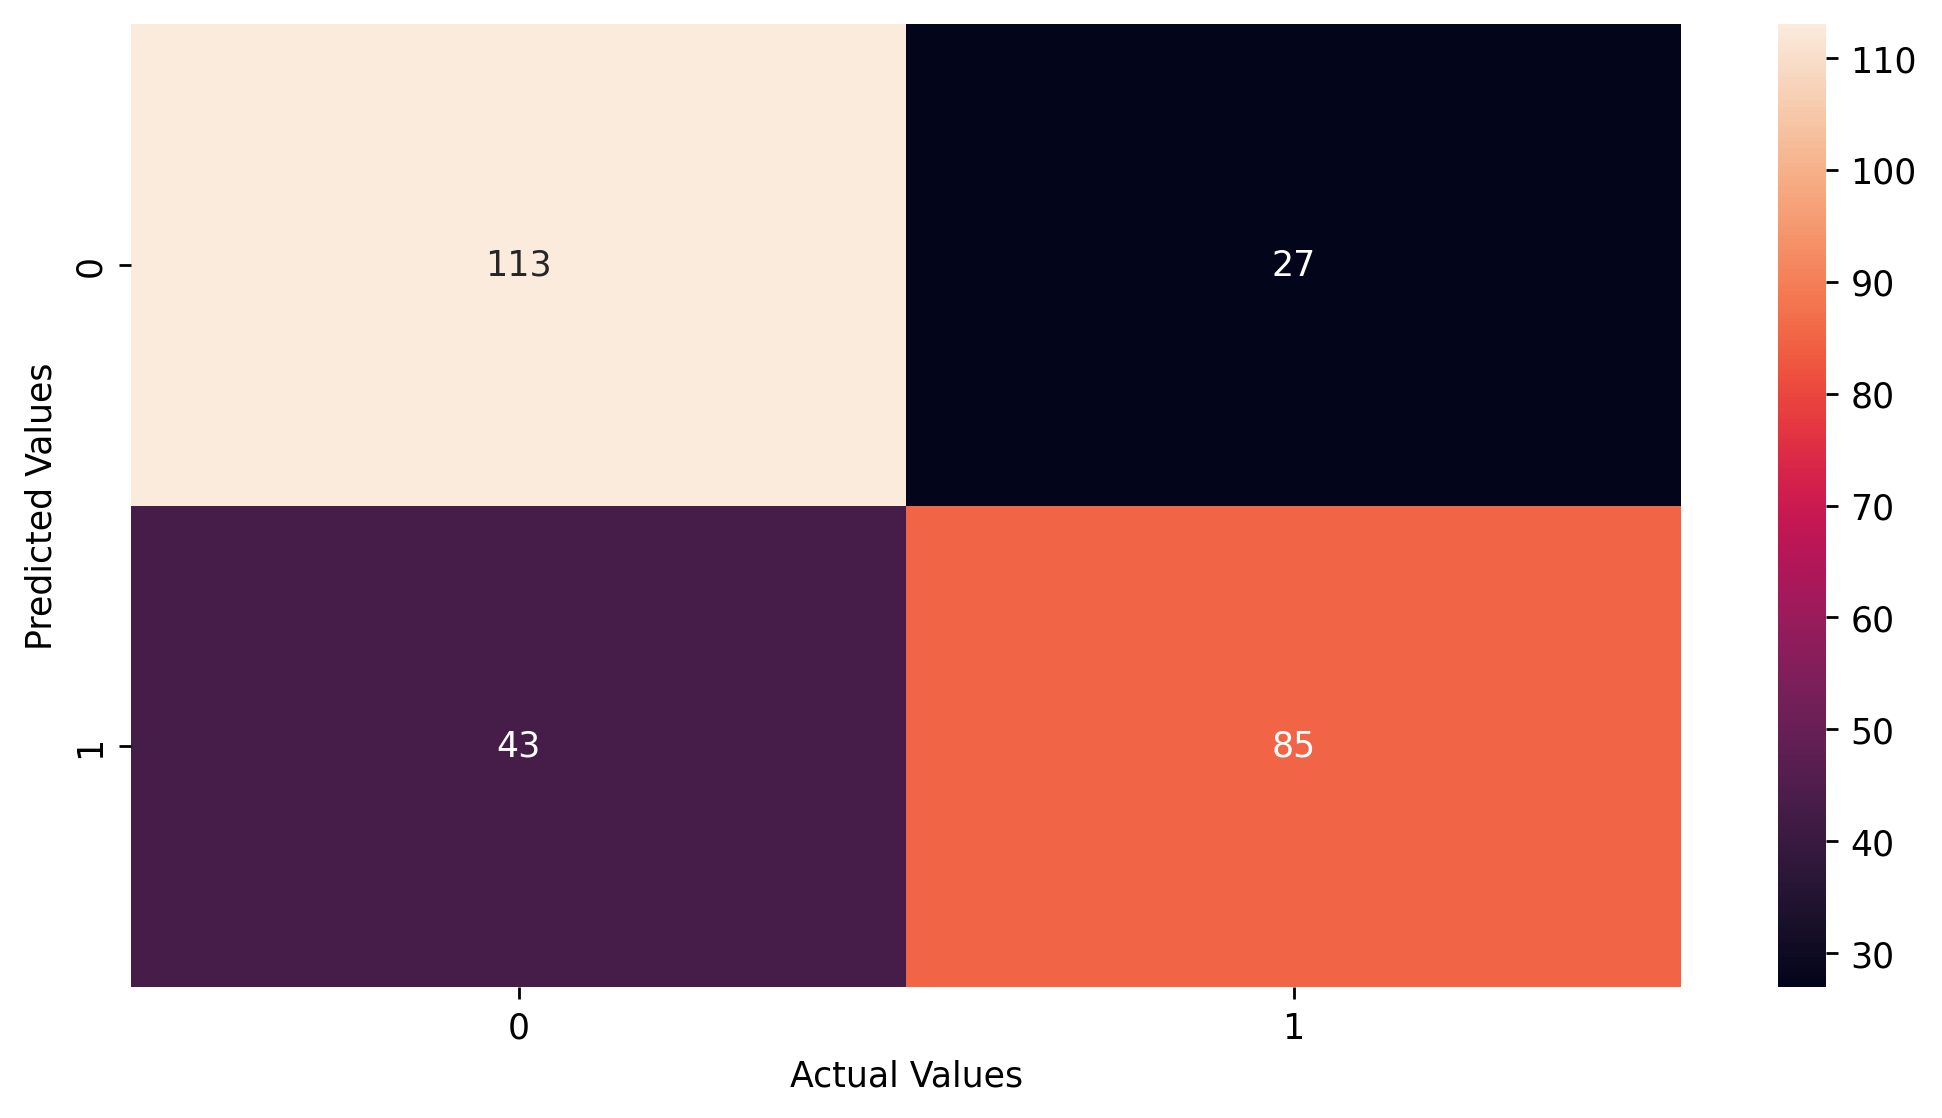

In [40]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True, fmt='g')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

### Threshold selection

![](sigmoid.png)

- If we want to Decrease my False Negative Value we have to Reduce our Threshold Value and 
- If we want to Decrease my False Positive Value we have to Increase our Threshold Value
- When dealing with classification models or any scenario where you're using a threshold to make a decision (such as in binary classification), adjusting the threshold can affect the trade-off between false positives and false negatives.
- Precision is a metric that focuses on minimizing false positives
- Recall is a metric that focuses on minimizing false negatives
- Precision increases Recall Decreases and vice versa
- In Order to find Optimal Threshold Value we will use ROC (Receiver Operator Characteristics)& AUC (Area under Curve)

![](tprfpr.png)

![](fprtprdia.png)

- We will select a Threshold where TPR is High and FPR is Low (Here Threshold 0.4 will be selected) because we want High Recall
- If we want High Precision we will select TPR is Low and FPR is High (Here Threshold 0.8 will be selected) because we want High Precision
- Selecting between Recall and Precision purely depend upon Problem Statement

![](auc.png)

- Area Under Curve is High then model performance is Good
- Area Under curve is Low then model performance is Not Good

In [41]:
xtest.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
394,1.0,1.0,0.0,5.0,5.163
881,0.0,0.0,0.0,30.0,5.570
358,1.0,1.0,0.0,41.0,0.671
367,0.0,1.0,0.0,34.0,0.567
259,0.0,1.0,1.0,66.0,4.530


In [42]:
ypred[:5]

array([1, 1, 0, 0, 1], dtype=int64)

In [43]:
# Logistic regression works on Probability. Means what is the Probability of getting 0 or 1
lg.predict_proba(xtest)[:,1]
# Probability of getting 0 = 2.11789289e-01 (21%), Probability of getting 1 = 7.88210711e-01 (79%)
# Below is done by considering Threshold 0.5
# If you are trying to Increase the Recall select the Positive/Upper column array[:,1] Probability associated with 1 class
# If you are trying to Increase the Precision select the Positive/Lower column array[:,0] Probability associated with 0 class

array([0.78821071, 0.87659534, 0.2986062 , 0.38445127, 0.8297433 ,
       0.64092364, 0.39890108, 0.45463549, 0.44292098, 0.87909809,
       0.33962635, 0.31872301, 0.4097136 , 0.44537759, 0.32277285,
       0.73744764, 0.33360801, 0.27281284, 0.34512747, 0.91339469,
       1.        , 0.70245786, 0.75938053, 0.50377016, 0.80171381,
       0.33265341, 0.25357962, 0.30549397, 0.36060377, 0.31719918,
       1.        , 0.42673106, 0.24019873, 0.34948609, 0.34705529,
       0.28707648, 0.41151982, 0.68809903, 0.26934924, 0.62706648,
       0.4414904 , 0.36694333, 0.46889672, 0.36624336, 0.26647148,
       0.56246823, 0.38243007, 0.66517171, 0.64894073, 0.4412    ,
       0.80178382, 0.39372775, 0.3015972 , 0.41417889, 0.20719538,
       1.        , 0.28340744, 0.29302456, 0.35271261, 0.3147238 ,
       0.99559029, 0.62348266, 0.29446574, 0.59144794, 0.56377085,
       0.30771535, 0.34000242, 0.84447142, 0.26647148, 0.31050882,
       0.43568429, 0.68593993, 0.32285261, 0.38573817, 0.30645

In [44]:
proba = lg.predict_proba(xtest)[:,1]

In [45]:
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score

In [46]:
auc = roc_auc_score(ytest,proba)
auc

0.7648158482142858

In [47]:
fpr, tpr, threshold = roc_curve(ytest, proba)

In [48]:
fpr

array([0.        , 0.        , 0.00714286, 0.00714286, 0.01428571,
       0.01428571, 0.02857143, 0.02857143, 0.03571429, 0.03571429,
       0.05      , 0.05      , 0.05714286, 0.05714286, 0.06428571,
       0.06428571, 0.07142857, 0.07142857, 0.07857143, 0.07857143,
       0.08571429, 0.08571429, 0.09285714, 0.09285714, 0.1       ,
       0.1       , 0.11428571, 0.11428571, 0.12142857, 0.12142857,
       0.12857143, 0.12857143, 0.13571429, 0.13571429, 0.15      ,
       0.15      , 0.15714286, 0.15714286, 0.16428571, 0.16428571,
       0.17142857, 0.17142857, 0.18571429, 0.18571429, 0.19285714,
       0.19285714, 0.2       , 0.2       , 0.22142857, 0.22142857,
       0.22857143, 0.22857143, 0.23571429, 0.23571429, 0.25      ,
       0.25      , 0.26428571, 0.26428571, 0.28571429, 0.3       ,
       0.3       , 0.35      , 0.35      , 0.35714286, 0.35714286,
       0.37857143, 0.37857143, 0.42142857, 0.42142857, 0.43571429,
       0.43571429, 0.47142857, 0.47142857, 0.5       , 0.5    

In [49]:
tpr

array([0.       , 0.0234375, 0.0234375, 0.078125 , 0.078125 , 0.0859375,
       0.0859375, 0.1015625, 0.1015625, 0.109375 , 0.109375 , 0.140625 ,
       0.140625 , 0.2109375, 0.2109375, 0.21875  , 0.21875  , 0.234375 ,
       0.234375 , 0.2421875, 0.2421875, 0.265625 , 0.265625 , 0.3125   ,
       0.3125   , 0.3359375, 0.3359375, 0.3515625, 0.3515625, 0.421875 ,
       0.421875 , 0.4296875, 0.4296875, 0.46875  , 0.46875  , 0.53125  ,
       0.53125  , 0.5546875, 0.5546875, 0.5625   , 0.5625   , 0.5859375,
       0.5859375, 0.625    , 0.625    , 0.6796875, 0.6796875, 0.6953125,
       0.6953125, 0.703125 , 0.703125 , 0.734375 , 0.734375 , 0.75     ,
       0.75     , 0.7578125, 0.7578125, 0.765625 , 0.765625 , 0.765625 ,
       0.7734375, 0.7734375, 0.7890625, 0.7890625, 0.796875 , 0.796875 ,
       0.8125   , 0.8125   , 0.8203125, 0.8203125, 0.828125 , 0.828125 ,
       0.84375  , 0.84375  , 0.8515625, 0.8515625, 0.859375 , 0.859375 ,
       0.8671875, 0.8671875, 0.8671875, 0.8671875, 

In [50]:
threshold

array([       inf, 1.        , 1.        , 0.99559029, 0.98435566,
       0.98109511, 0.95343001, 0.93382055, 0.92746387, 0.92060623,
       0.90384582, 0.8668176 , 0.85310899, 0.81599758, 0.80316271,
       0.80178382, 0.80171381, 0.79761455, 0.79187796, 0.78821071,
       0.78746673, 0.76216798, 0.76086392, 0.73305518, 0.72914171,
       0.71234596, 0.70245786, 0.69532357, 0.69429674, 0.67126479,
       0.66517171, 0.65338508, 0.65065165, 0.64092364, 0.63646197,
       0.6088348 , 0.60170102, 0.58450621, 0.58442411, 0.57609824,
       0.56942905, 0.55869187, 0.55296542, 0.53729489, 0.53072904,
       0.49739259, 0.48871241, 0.46889672, 0.46372046, 0.45463549,
       0.45064387, 0.44292098, 0.4414904 , 0.43639883, 0.43568429,
       0.43562243, 0.42673106, 0.42097172, 0.41417889, 0.41151982,
       0.41145826, 0.39890108, 0.39622523, 0.39609681, 0.39559741,
       0.39355557, 0.38969119, 0.38573817, 0.38445127, 0.38243007,
       0.37961974, 0.36694333, 0.36624336, 0.35959518, 0.35938

In [51]:
len(threshold)

110

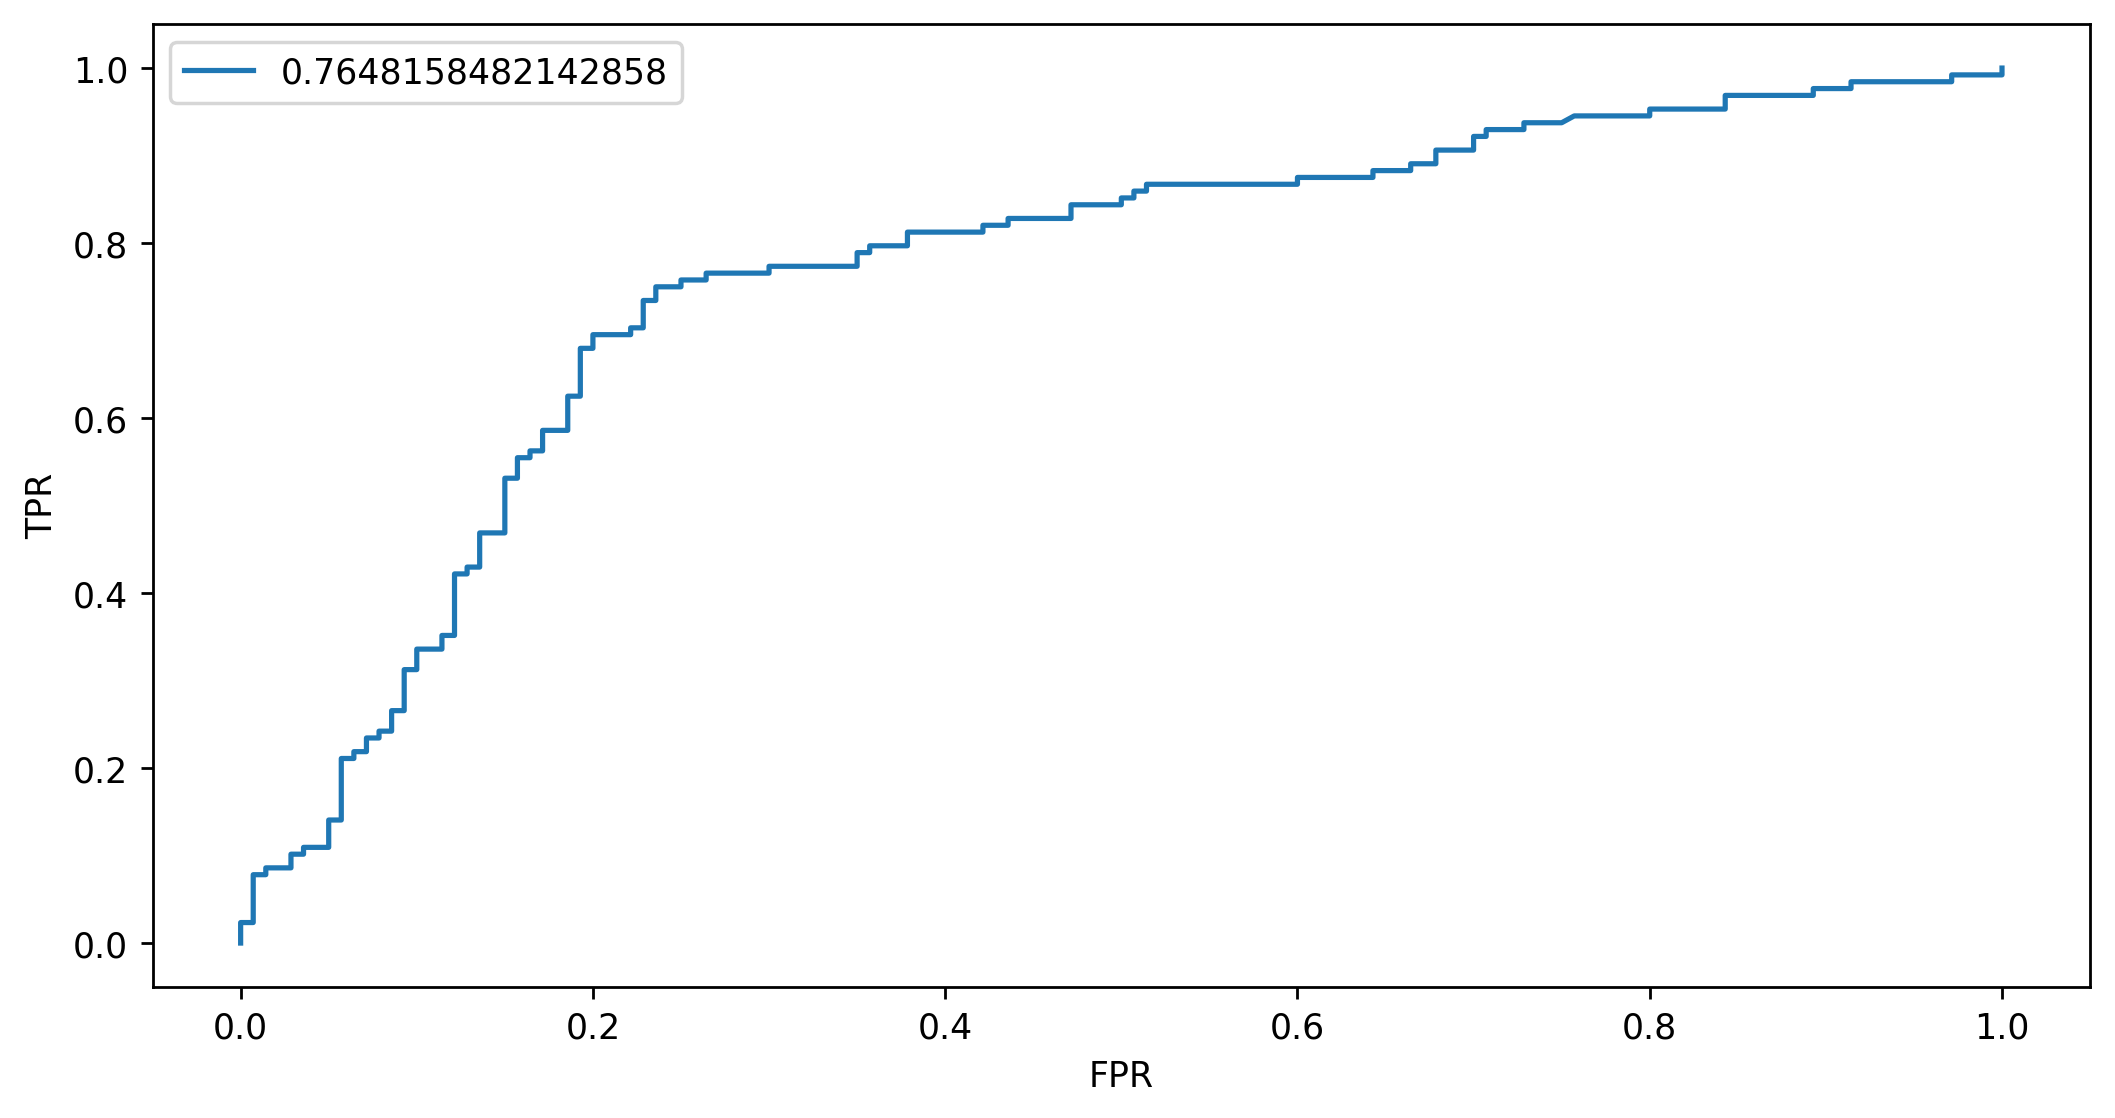

In [52]:
plt.plot(fpr,tpr, label = auc)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

In [53]:
accuracy = []
for i in threshold:
    ypred = np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))

In [54]:
accuracy

[0.5223880597014925,
 0.5223880597014925,
 0.5335820895522388,
 0.5522388059701493,
 0.5559701492537313,
 0.5522388059701493,
 0.5522388059701493,
 0.5522388059701493,
 0.5559701492537313,
 0.5522388059701493,
 0.5522388059701493,
 0.5597014925373134,
 0.5634328358208955,
 0.5895522388059702,
 0.5932835820895522,
 0.5895522388059702,
 0.5932835820895522,
 0.5932835820895522,
 0.5970149253731343,
 0.5932835820895522,
 0.5970149253731343,
 0.6007462686567164,
 0.6044776119402985,
 0.6194029850746269,
 0.6231343283582089,
 0.6268656716417911,
 0.6268656716417911,
 0.6268656716417911,
 0.6305970149253731,
 0.6567164179104478,
 0.6604477611940298,
 0.6567164179104478,
 0.6604477611940298,
 0.6716417910447762,
 0.6716417910447762,
 0.6940298507462687,
 0.6977611940298507,
 0.7014925373134329,
 0.7052238805970149,
 0.7014925373134329,
 0.7052238805970149,
 0.7089552238805971,
 0.7089552238805971,
 0.7201492537313433,
 0.7238805970149254,
 0.7425373134328358,
 0.746268656716418,
 0.74626865671

In [55]:
thres_sele= pd.DataFrame({
    'Threshold' : threshold,
    'Accuracy' : accuracy
})

In [56]:
thres_sele

,Threshold,Accuracy
0,inf,0.522388
1,1.000000,0.522388
2,1.000000,0.533582
3,0.995590,0.552239
4,0.984356,0.555970
...,...,...
105,0.266330,0.511194
106,0.240199,0.488806
107,0.239893,0.485075
108,0.207195,0.477612


In [57]:
thres_sele.sort_values(by="Accuracy", ascending=False)

,Threshold,Accuracy
54,0.435684,0.753731
53,0.436399,0.753731
52,0.441490,0.753731
55,0.435622,0.750000
56,0.426731,0.750000
...,...,...
105,0.266330,0.511194
106,0.240199,0.488806
107,0.239893,0.485075
108,0.207195,0.477612


In [58]:
# Accuracy of the model at 0.435684 is 0.753731

In [59]:
from sklearn.preprocessing import binarize

In [60]:
newthres = binarize([proba], threshold=0.442068)[0]
# [proba] we have to like this because binarize only calculate 2d array
# [0] selecting the [0] array because ytest is 1d array 
newthres

array([1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0.

In [61]:
print(classification_report(ytest,newthres))
#here the recall value is increased from 0.66 to 0.73

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       140
           1       0.75      0.73      0.74       128

    accuracy                           0.75       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.75      0.75      0.75       268

